<a href="https://colab.research.google.com/github/PedroAlmeida18/PGP3_TESTESIND/blob/main/Projeto_RedesNeurais_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**REDES NEURAIS**

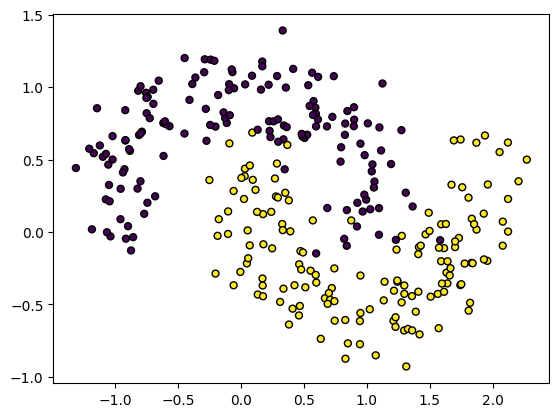

In [1]:

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o',
 c=Y1, s=25, edgecolor='k')

#NN.SEQUENTIAL


In [2]:
import torch
from torch import nn # Pacote neural networks

input_size = 2
output_size = 1
hidden_size = 8
net = nn.Sequential(nn.Linear(in_features=input_size ,out_features = hidden_size),nn.ReLU(), nn.Linear(in_features=hidden_size
                                                                                                       , out_features= output_size))


print(net)


Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [17]:
from torchsummary import summary
summary(net, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


#FORWARD

In [3]:

#transformação do dado de entrada em um tensor
print(X1.shape)
tensor = torch.from_numpy(X1).float()
print(X1.dtype)
pred = net(tensor)
print(pred.size())

(300, 2)
float64
torch.Size([300, 1])


#Module

In [4]:
import torch.nn as nn
import torch.nn.functional as F
class MinhaRede(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()

    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, X):

    # Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)

    return output




Iniciar a rede


In [5]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size,hidden_size, output_size)  ## O método __init__()
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


#Forward

In [6]:
#transformação do dado de entrada em um tensor
print(X1.shape)
tensor = torch.from_numpy(X1).float()
print(X1.dtype)
pred = net(tensor)
print(pred.size())

(300, 2)
float64
torch.Size([300, 1])


#Informações na GPU

In [7]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


In [8]:

input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size,hidden_size, output_size)  ## O método __init__()
net = net.to(device)
print(net)


MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [9]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])
